Q1

Looking in indexes: https://test.pypi.org/simple/
     |████████████████████████████████| 1.5 MB 6.0 MB/s 
     |████████████████████████████████| 75 kB 2.6 MB/s 
     |████████████████████████████████| 1.6 MB 22.0 MB/s 
     |████████████████████████████████| 154 kB 45.8 MB/s 
  Created wheel for brian2: filename=Brian2-2.3-cp37-cp37m-linux_x86_64.whl size=1283967 sha256=f8afca6daecb3c650828d80fac054e58072590582e7b3589acac77ef789c16ae
  Stored in directory: /root/.cache/pip/wheels/59/ac/59/705b1babcd0bee25cc7e56c5616ed85dbd7afab2942e8b18cd
Successfully built brian2
  Attempting uninstall: brian2
    Found existing installation: Brian2 2.5.0.3.post0.dev84
    Uninstalling Brian2-2.5.0.3.post0.dev84:
      Successfully uninstalled Brian2-2.5.0.3.post0.dev84
nr of spikes: 0


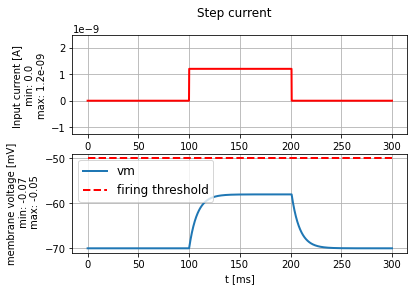

nr of spikes: 5


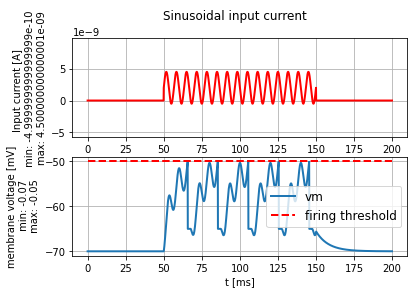

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [1]:
%matplotlib inline
!python -m pip install --upgrade --pre -i https://test.pypi.org/simple/ Brian2
!pip install neurodynex3
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()
V_REST = -70*b2.mV
V_RESET = -65*b2.mV
FIRING_THRESHOLD = -50*b2.mV
MEMBRANE_RESISTANCE = 10. * b2.Mohm
MEMBRANE_TIME_SCALE = 8. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms

In [2]:
T = 400
dt = 0.1
time = np.arange(0, T+dt, dt) 
Vth = -55
Vreset = -75
tau_m = 10
gL = 10
R = 1/gL
Vinit = -75
EL = -75
tref = 2
V_REST = Vreset*b2.mV
V_RESET = Vreset*b2.mV
FIRING_THRESHOLD = Vth*b2.mV
MEMBRANE_RESISTANCE = R* b2.Mohm
MEMBRANE_TIME_SCALE = 10. * b2.ms
ABSOLUTE_REFRACTORY_PERIOD = tref * b2.ms

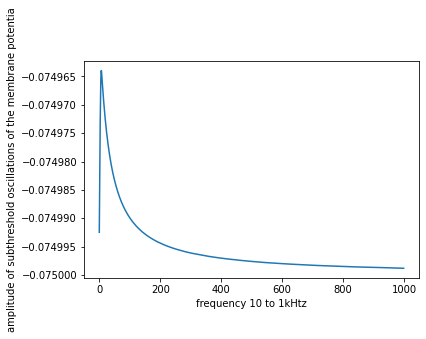

In [4]:
from neurodynex3.tools.input_factory import get_sinusoidal_current
tref = 2
dt = 0.1
Vm = []
for freq in [i+1 for i in range(1000)]:
    current = get_sinusoidal_current(0, 400, unit_time = dt*b2.ms, amplitude = 0.4*b2.namp, frequency = freq*b2.Hz, direct_current = 0.*b2.namp)
    (state_monitor, _) = LIF.simulate_LIF_neuron(input_current=current, simulation_time = T*b2.ms,
                                                                v_rest=V_REST, v_reset=V_RESET, firing_threshold=FIRING_THRESHOLD,
                                                                membrane_resistance=MEMBRANE_RESISTANCE, membrane_time_scale=MEMBRANE_TIME_SCALE,
                                                                abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD)
    Vm.append(np.max(state_monitor[0].v))
plt.plot(Vm)
plt.xlabel("frequency 10 to 1kHtz")
plt.ylabel("amplitude of subthreshold oscillations of the membrane potentia")
plt.show()

Q2

In [ ]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.stats import pearsonr
def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
print("lowpass, highpass")
for freq in [10, 100, 300, 700, 900]:
    current = get_sinusoidal_current(0, 4000, unit_time = dt*b2.ms, amplitude = 0.04*b2.namp, frequency = freq*b2.Hz, direct_current = 0.*b2.namp)
    (state_monitor, _) = LIF.simulate_LIF_neuron(input_current=current, simulation_time = T*b2.ms,
                                                                    v_rest=V_REST, v_reset=V_RESET, firing_threshold=FIRING_THRESHOLD,
                                                                    membrane_resistance=MEMBRANE_RESISTANCE, membrane_time_scale=MEMBRANE_TIME_SCALE,
                                                                    abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD)
    order = 6
    fs = 30.0
    cutoff = 3.667
    lowpass = butter_lowpass_filter(current.values.reshape(4002,)[:4000], cutoff, fs, order)
    highpass = butter_highpass_filter(current.values.reshape(4002,)[:4000], cutoff, fs, order)
    print(pearsonr(lowpass, state_monitor[0].v)[0],pearsonr(highpass, state_monitor[0].v)[0])

lowpass, highpass
0.8693386125355634 0.00031744640522298796
0.41645981236183527 0.014963431290236234
0.7564272772972334 0.016517974269291903
0.8852588319903689 -0.07625244349053623
0.3740642674024226 -0.24887947229647406


Q4

In [ ]:
from neurodynex3.tools.input_factory import get_step_current
tref = 3
F = []
for I in np.linspace(1, 200, 100):
        current = get_step_current(0, 4000, unit_time = 0.1*b2.ms, amplitude = I*b2.namp)  
        (state_monitor,_) = LIF.simulate_LIF_neuron(input_current=current, simulation_time = 400*b2.ms,
                                                                v_rest=-75.*b2.mV, v_reset=-75.*b2.mV, firing_threshold=-55.*b2.mV,
                                                                membrane_resistance=100.*b2.Mohm, membrane_time_scale=10.*b2.ms,
                                                                abs_refractory_period=tref*b2.ms)
        T = np.argmax(list(np.array(state_monitor[0].v)))*dt + tref
        F.append(1 / T)

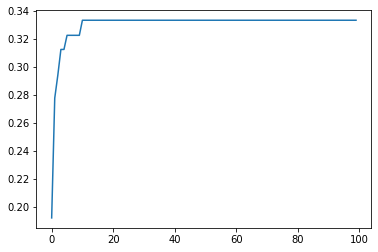

In [ ]:
plt.plot(F)

Q3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
def LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, I, time):
    V = [Vinit]
    is_in_ref = False
    cntr = 0
    for t in range(len(time)):
        if cntr > tref/dt:
            is_in_ref = False
            cntr = 0
        if not is_in_ref:
            dv = (EL-V[-1]+I[t]/gL)/tau_m*dt
            Vt = V[-1] + dv
            if Vt >= Vth:
                is_in_ref = True
                Vt = Vreset
                cntr += 1
            V.append(Vt)
        else:
            Vt = Vreset
            cntr += 1
            V.append(Vt)
    return V

In [ ]:
T = 400
dt = 0.1
time = np.arange(0, T+dt, dt) 
Vth = -55
Vreset = -75
tau_m = 10
gL = 10
Vinit = -75
EL = -75
tref = 3
for I in [i for i in range(300)]:
    I = np.ones(len(time))*I
    V = LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, I, time)
    if round(np.max(V),4) >= -55 :
        print(I[0])
        I = I[0]
        break

200.0


[]

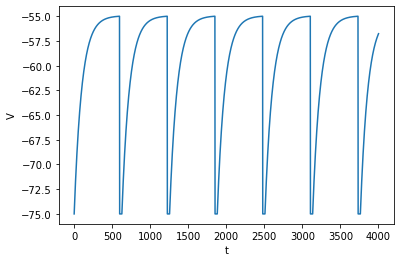

In [ ]:
I = np.ones(len(time))*(I+0.5)
V = LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, I, time)
plt.plot(V)
plt.xlabel("t")
plt.ylabel("V")
plt.plot()

[]

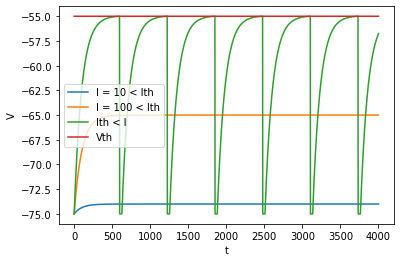

In [ ]:
Vpre = LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, np.ones(len(time))*10, time)
Vpre1 = LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, np.ones(len(time))*100, time)
Vpost = LIF(Vth, Vreset, tau_m, gL, Vinit, EL, tref, T, dt, I, time)
plt.plot(Vpre, label = "I = 10 < Ith")
plt.plot(Vpre1, label = "I = 100 < Ith")
plt.plot(Vpost, label = "Ith < I")
plt.plot(np.ones(len(time))*Vth, label = "Vth")
plt.legend()
plt.xlabel("t")
plt.ylabel("V")
plt.plot()